In [1]:
import pandas as pd
import librosa
import os

In [23]:
df = pd.read_csv('./data/results_wav.csv', sep=';')

df.head()

,title,region,keyword,duration,url,path,wav_path
0,KICIR KICIR - Lagu dan Tari Nusantara - Lagu Anak,Jakarta,Kicir-Kicir asal Jakarta,3.54,https://www.youtube.com/watch?v=0wTJULU2REc&pp...,datasets/songs/kicir_kicir_lagu_dan_tari_nusan...,datasets/wav_songs/kicir_kicir_lagu_dan_tari_n...
1,KICIR KICIR | Lagu Daerah Jakarta (Betawi) | D...,Jakarta,Kicir-Kicir asal Jakarta,4.40,https://www.youtube.com/watch?v=LU3YHPgRxQo&pp...,datasets/songs/kicir_kicir_lagu_daerah_jakarta...,datasets/wav_songs/kicir_kicir_lagu_daerah_jak...
2,Kicir Kicir Jakarta,Jakarta,Kicir-Kicir asal Jakarta,3.52,https://www.youtube.com/watch?v=jMynoFKskhc&pp...,datasets/songs/kicir_kicir_jakarta.mp3,datasets/wav_songs/kicir_kicir_jakarta.wav
3,ONDEL ONDEL | Lagu Daerah DKI Jakarta - Betawi...,jakarta,Ondel Ondel asal jakarta,3.39,https://www.youtube.com/watch?v=wardyOl-EHo&pp...,datasets/songs/ondel_ondel_lagu_daerah_dki_jak...,datasets/wav_songs/ondel_ondel_lagu_daerah_dki...
4,ONDEL ONDEL 💞 LAGU DAERAH DKI JAKARTA | ONDEL ...,jakarta,Ondel Ondel asal jakarta,4.44,https://www.youtube.com/watch?v=_X39qcf41ZU&pp...,datasets/songs/ondel_ondel_lagu_daerah_dki_jak...,datasets/wav_songs/ondel_ondel_lagu_daerah_dki...


In [24]:
def get_duration(file_path):
    if file_path is None:
        print('skipping file path is None')
        return None, None
    
    y, sr = librosa.load(file_path)
    duration = librosa.get_duration(y=y, sr=sr)
    print(f'sample rate: {sr}, duration: {duration}')
    return sr, duration

In [25]:
df['sample_rate'], df['duration_sec'] = zip(*df['wav_path'].map(get_duration))


sample rate: 22050, duration: 233.89460317460316
sample rate: 22050, duration: 279.9397732426304
sample rate: 22050, duration: 231.29396825396825
sample rate: 22050, duration: 218.17469387755102
sample rate: 22050, duration: 283.39954648526077
sample rate: 22050, duration: 169.29668934240362
sample rate: 22050, duration: 235.7986394557823
sample rate: 22050, duration: 233.08190476190475
sample rate: 22050, duration: 105.62757369614512


In [27]:
df.describe()

,duration,sample_rate,duration_sec
count,9.000000,9.0,9.000000
mean,3.372222,22050.0,221.167488
std,0.917030,0.0,54.768339
min,1.460000,22050.0,105.627574
25%,3.390000,22050.0,218.174694
50%,3.540000,22050.0,233.081905
75%,3.560000,22050.0,235.798639
max,4.440000,22050.0,283.399546


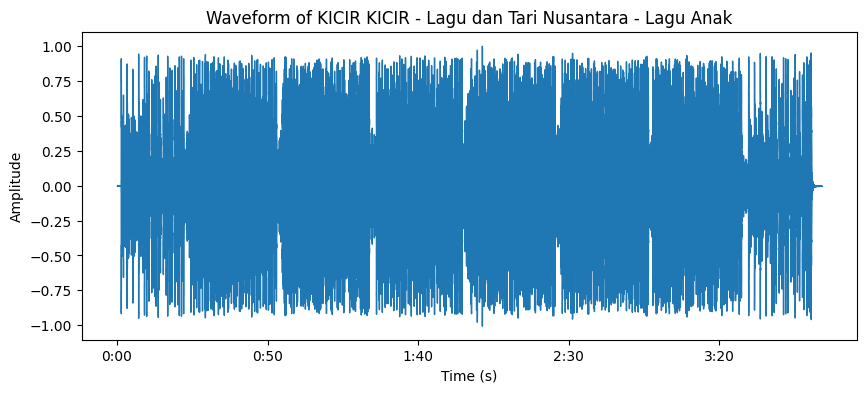

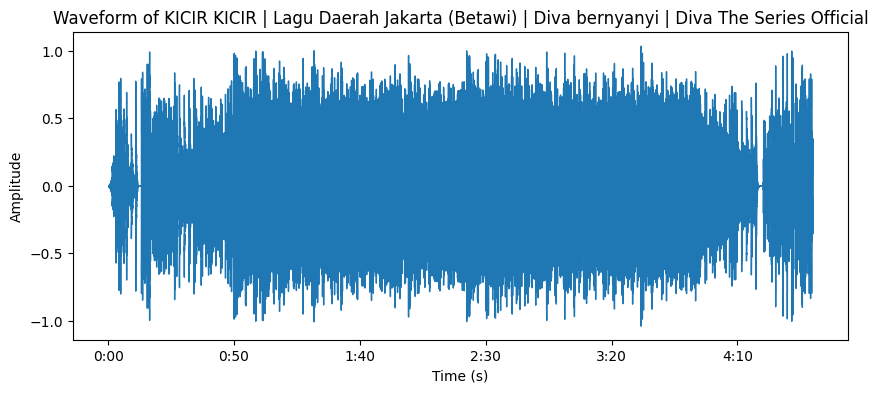

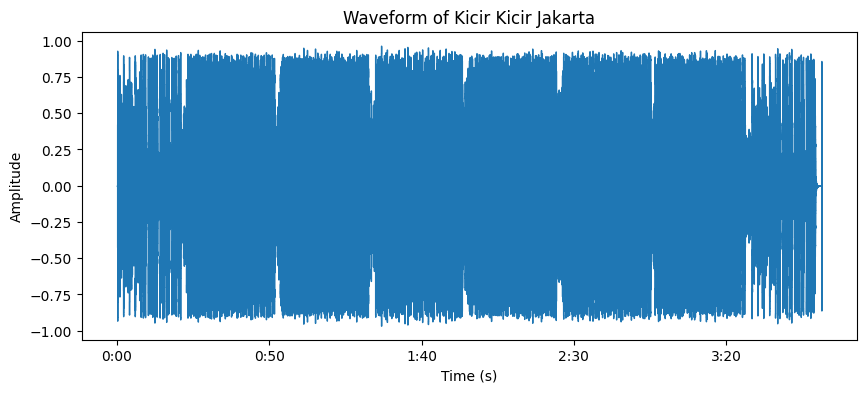

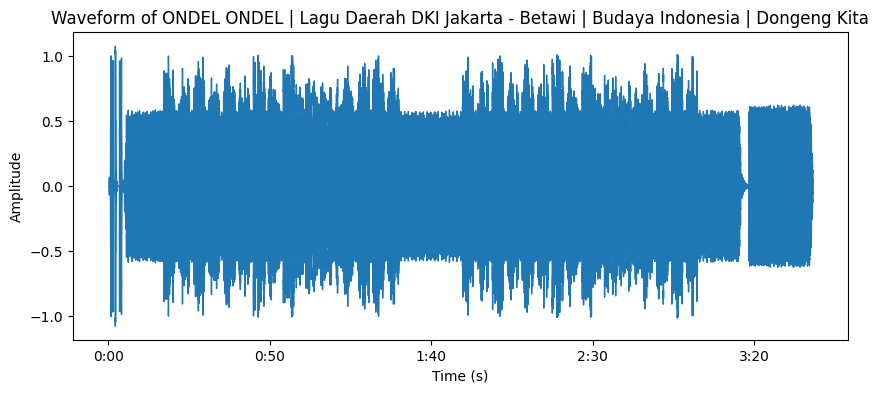

/home/reiaslite/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128158 (\N{REVOLVING HEARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


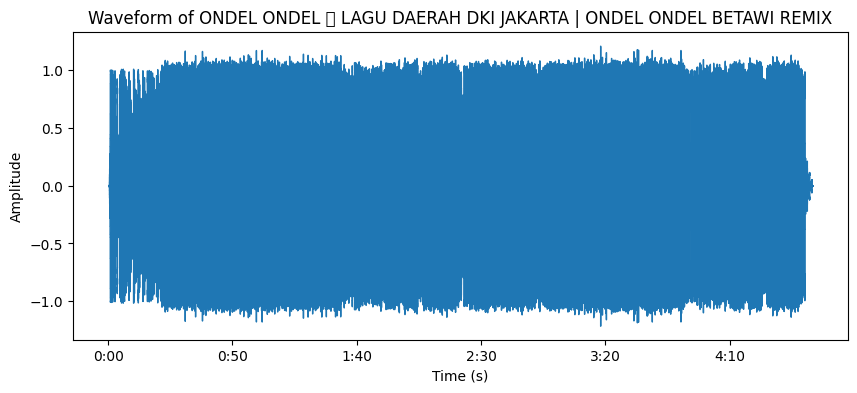

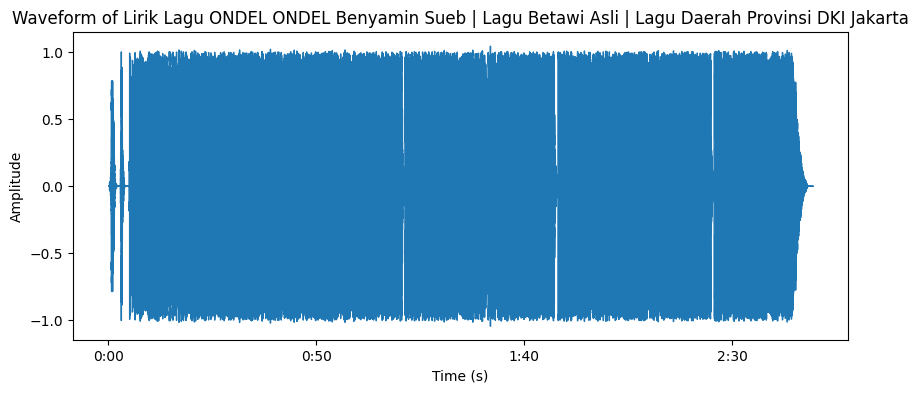

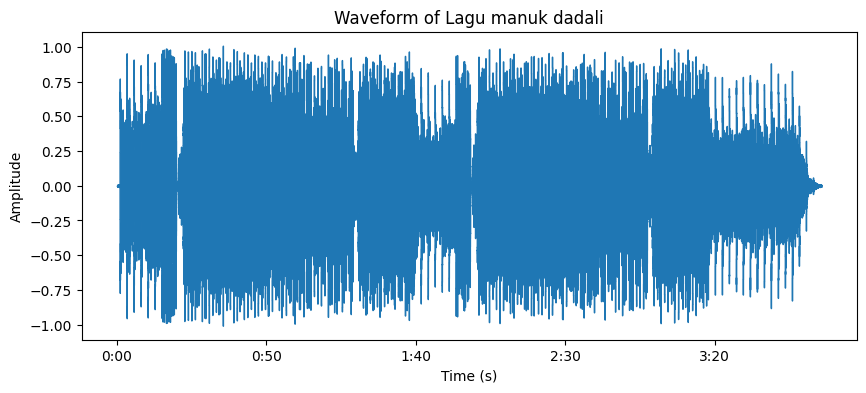

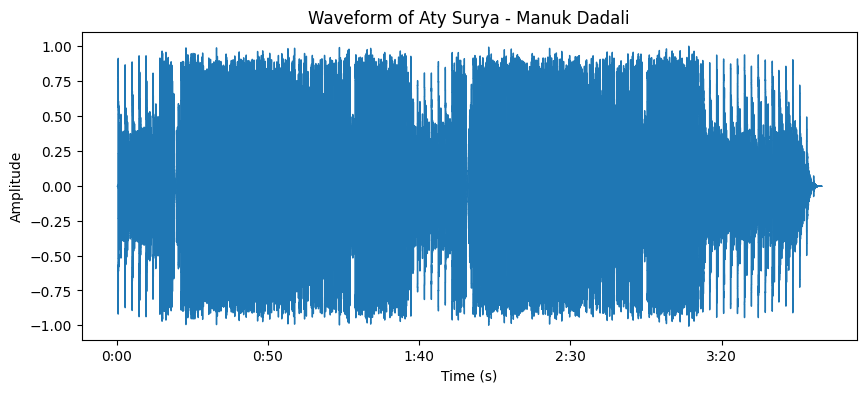

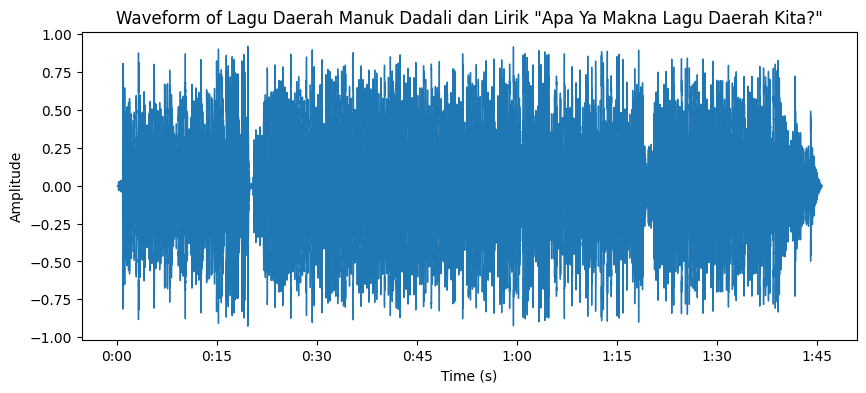

In [32]:

import matplotlib.pyplot as plt

for index, row in df.iterrows():
    y, sr = librosa.load(row['wav_path'])
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform of {row['title']}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()